<a href="https://colab.research.google.com/github/GuillermoSainz07/Notebooks-DS/blob/main/Yield_Curve_and_Interest_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yield Curve and Interest Rate Modeling

Una curva de rendimiento representa las tasas de interes o rendimientos a lo largo de un rango de vencimientos, generalmente representados en una grafico de linea. La curva de rendimientos ilustra el precio de los fondos en un momento dado y debido al valor temporal del dinero a menudo muestra que las tasas de interes aumnetan como un funcion de vencimiento

La reduccion de dimensionalidad desglosa el movimiento de la curva de rendimiento en 3 factores. Reducir la curva de rendimientos a menos componentes significa que podemos centrarnos en algunas dimensiones intuitivas en la curva de rendimientos. Los operadores y gestores de riesgos utilizan esta tecnica para condensar la curva en factores de riesgo para cubrir el riesgo de la tasa de interes. De manera similar, los administradores de carteras tienen menos dimensiones que analizar para asignar sus fondos. Los estructuradores de tasas de interes utilizan esta tecnica para modelar la curva de rendimiento y mejorar su forma. En general, promueve una gestion de cartera, el comercio, la cobertura y la gestion de riesgos mas rapido y eficaz

En este notebook utilizamos PCA para generar movimientos tipicos de una `Yiel Curve` y mostrar que los 3 primeros componentes principales corresponden al **nivel, pendiente y la curvatura** de una `Yiel Curve`

In [ ]:
!pip install quandl

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl

In [ ]:
quandl.ApiConfig.api_key = 'xozrHbZ6Vzra_UbyGWMy'

In [ ]:
treasury = ['FRED/DGS1MO',
           'FRED/DGS3MO',
           'FRED/DGS6MO',
           'FRED/DGS1',
           'FRED/DGS2',
           'FRED/DGS3',
           'FRED/DGS5',
           'FRED/DGS7',
           'FRED/DGS10',
           'FRED/DGS20',
           'FRED/DGS30']

treasury_df = quandl.get(treasury)
treasury_df.columns = ['TRESY1mo',
                    'TRESY3mo',
                    'TRESY6mo',
                    'TRESY1y',
                    'TRESY2y',
                    'TRESY3y',
                    'TRESY5y',
                    'TRESY7y',
                    'TRESY10y',
                    'TRESY20y',
                    'TRESY30y']

In [ ]:
dataset = treasury_df

In [ ]:
dataset.head()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [ ]:
dataset.isna().mean()

TRESY1mo    0.653307
TRESY3mo    0.324206
TRESY6mo    0.324206
TRESY1y     0.000000
TRESY2y     0.237566
TRESY3y     0.000000
TRESY5y     0.000000
TRESY7y     0.123677
TRESY10y    0.000000
TRESY20y    0.111706
TRESY30y    0.249339
dtype: float64

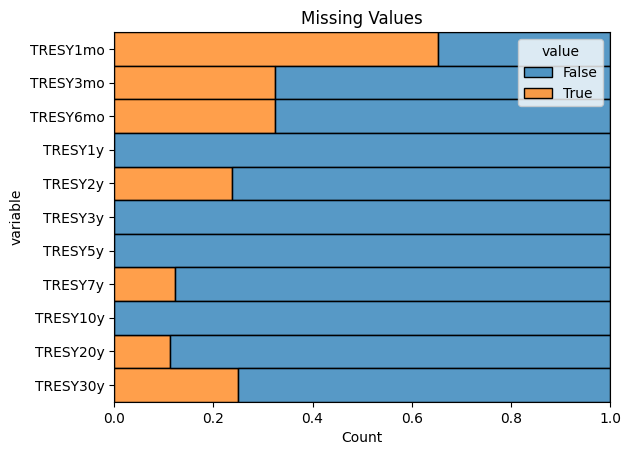

In [ ]:
sns.histplot(dataset.isna().melt(), y='variable', hue='value', multiple='fill')
plt.title('Missing Values')
plt.show()

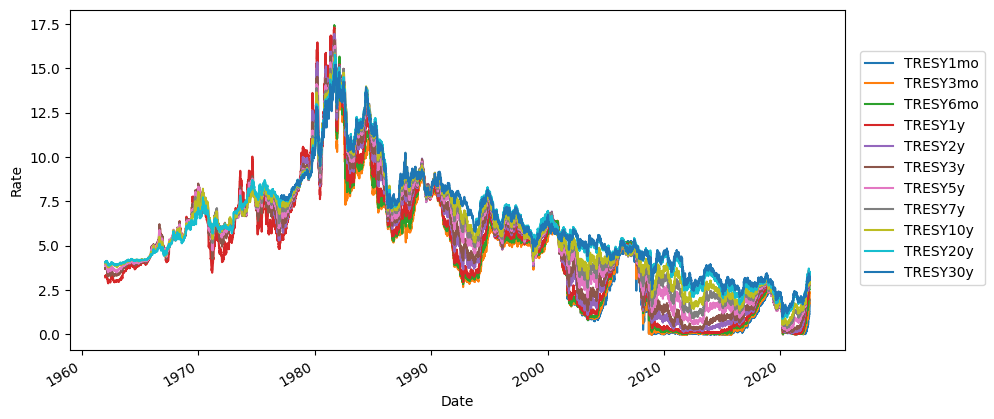

In [ ]:
dataset.plot(figsize=(10,5))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

<Axes: >

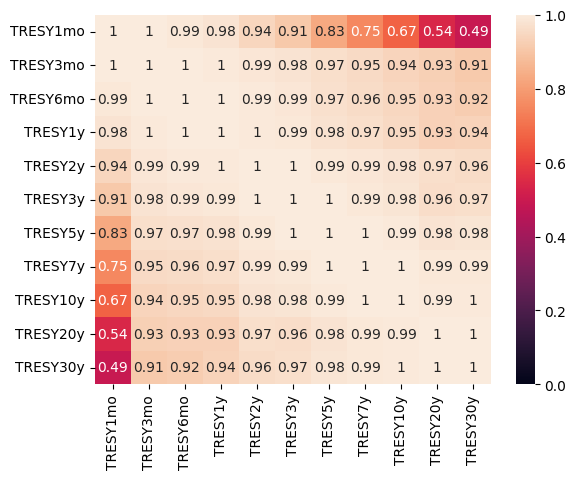

In [ ]:
correlacion = dataset.corr()
sns.heatmap(correlacion, vmin=0, vmax=1, annot=True)

## Preparacion de datos

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
dataset = dataset.fillna(method='ffill')
dataset = dataset.dropna(axis=0)
dataset.shape

(5242, 11)

## Data Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
rescaledData = pd.DataFrame(scaler.fit_transform(dataset),columns=dataset.columns, index=dataset.index)

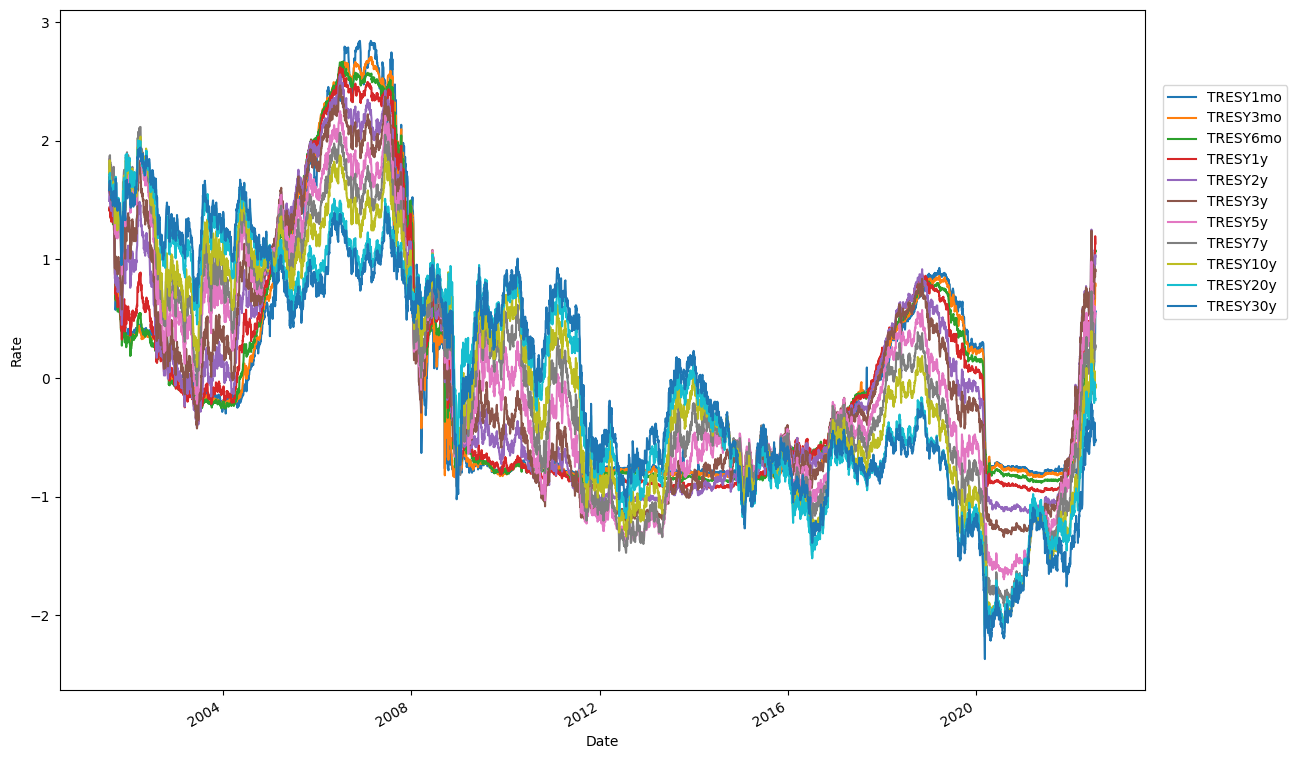

In [ ]:
rescaledData.plot(figsize=(14,10))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

## Evaluacion de algoritmos

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
principal = pca.fit(rescaledData)

**Varianza explicada usando pca**

In [ ]:
n = 5
variance_explained = pd.DataFrame(np.cumsum(principal.explained_variance_ratio_[:5]),
                                  columns=['variance %'], index=[0,1,2,3,4])
variance = pd.DataFrame(principal.explained_variance_ratio_[:5],columns=['variance'])


In [ ]:
variance

,variance
0,0.845547
1,0.141015
2,0.010907
3,0.001428
4,0.000497


In [ ]:
variance_explained

,variance %
0,0.845547
1,0.986562
2,0.997469
3,0.998896
4,0.999394


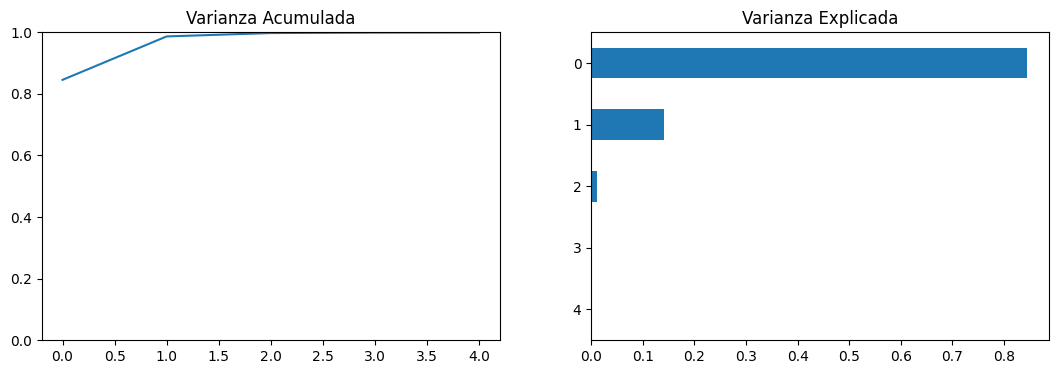

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(13,4))

variance_explained.plot(ylim=(0,1), ax=ax[0], title='Varianza Acumulada', legend=False)
variance.sort_values(by='variance').plot(kind='barh', ax=ax[1], title='Varianza Explicada', legend=False)
plt.show()

## Intuicion detras de los componentes principales

Podemos tener algo de intuicion e interpretacion de estos componentes principales. Primero determinaremos los pesos de cada componente principal y luego realizaremos la visualizacion de los componentes principales

In [ ]:
def PCweights():

  weights = pd.DataFrame()

  for i in range(len(pca.components_)):
    weights[f'weights_{i}'] = pca.components_[i] / sum(pca.components_[i])

  weights = weights.values.T

  return weights


In [ ]:
weights = PCweights()

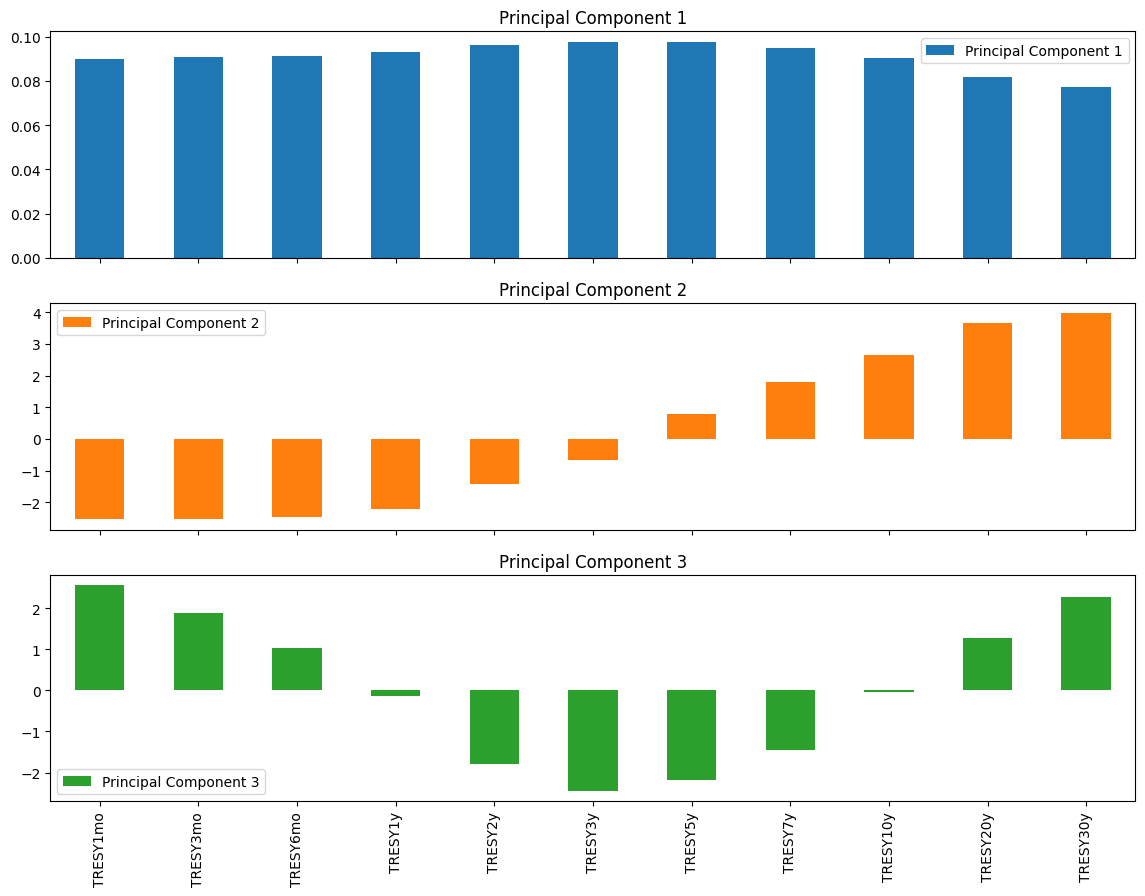

In [ ]:
n_comp = 3

topPortfolio = pd.DataFrame(weights[:n_comp], columns=dataset.columns)
topPortfolio.index = [f'Principal Component {i}' for i in range(1, n_comp+1)]

topPortfolio.T.plot(kind='bar', subplots=True, figsize=(14,10))
plt.show()

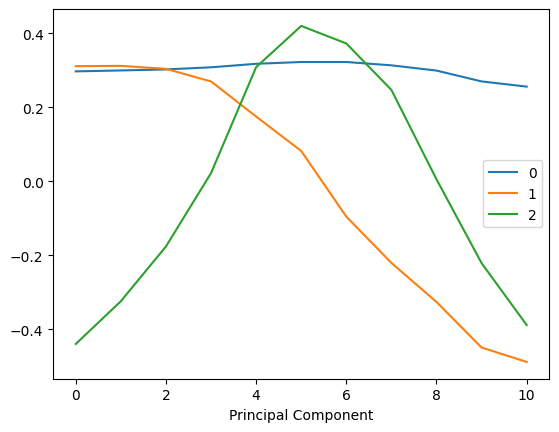

In [ ]:
plt.plot(pca.components_[0:3].T)
plt.legend(['0','1','2'])
plt.xlabel("Principal Component")
plt.show()

## Interpretacion de los componentes principales

* Componente principal 1:
  Este vector propio (de la matriz de varianza-covarianza) tiene todos los valores positivos, con todos los tenores ponderados en la misma direccion. Esto significa que el primer componente principal refleja los movimientos que hacen que todos los vencimientos se muevan en la misma direccion, lo que corresponde a los movimientos direccionales en la curva de rendimiento. Estos son movimientos que mueven toda la curva de rendimiento hacia arriba o hacia abajo

* Componente principal 2:
  El segundo vector propio tiene la primera mitad de los componentes negativos y la segunda mitad positivos. Las tasas del tesoro en el extremo corto (extremo largo) de la curva se ponderan positivamente (negativamente). Esto signifcia que la segunda composicion principal reflaja los movimientos que hacen que el extremo corto vaya en una direccion y el extremo largo en la otra. En consecuencia, representa los movimientos de pendiente en la curva de rendimiento

* Componente principal 3:
  El tercer vector propio tiene el primer tercio positivo, el segundo tercio negativo y el tercer tercio positivo. Esto significa que el tercer componente principal refleja los movimientos que hace que el extremo corto y el largo vayan en una direccion y que el del medio vaya en otra, lo que resulta en movimientos de curvatura de la curva de rendimento

En conclusion esto 3 vectores propio (componentes principales) representan los movimientos direccionales, movimientos de pendiente y los movimientos de curvatura, a su vez que explican mas del 99% de la varianza de las curvas de rendimiento

## Reconstruccion de la curva usando componentes principales

In [ ]:
transform = pca.transform(rescaledData)
reconst = pca.inverse_transform(transform)

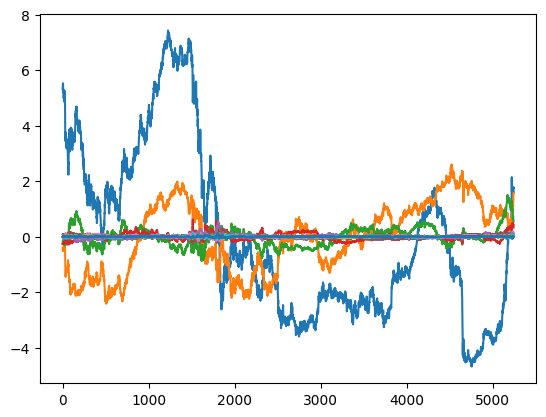

In [ ]:
plt.plot(transform)
plt.show()

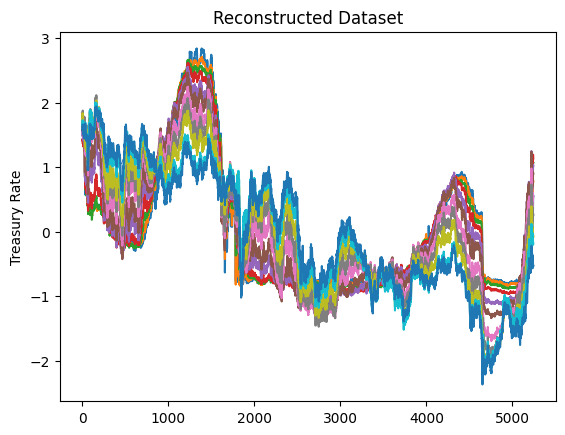

In [ ]:
plt.plot(reconst)
plt.ylabel("Treasury Rate")
plt.title("Reconstructed Dataset")
plt.show()